In [ ]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [24]:
def compare_xyz_spin_amp_with_pearson(corr_par,corr_val,pars,df_data,df_spin,corr_with,spin=True,plot=True,title=None):
    par_of_interest = corr_val
    x_list = []
    y_list = []
    spin_list = []
    z_list = []
    if(spin==True): df = df_spin
    if(spin==False): df =df_data     
        
    for i in pars:
        x_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[0],i)]))
        y_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[1],i)]))
        z_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[2],i)]))
        spin_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_spin["%s_%d" %(corr_with[3],i)]))
    #print("Freq:",par_of_interest)
    #print(np.argmax(x_list),(np.argmin(x_list)))
    #print(np.argmax(y_list),(np.argmin(y_list)))
    #print(np.argmax(z_list),(np.argmin(z_list)))
    #print(np.argmax(spin_list),(np.argmin(spin_list)))
    if(plot==True):
        if(title!=None):
            title = title
            plt.title(title)
        else:    
            plt.title("correlation with %s_%d" %(corr_par,par_of_interest))
        plt.plot(pars,x_list,marker="$X$",linestyle="--",markersize=12,label="%s" %corr_with[0])
        plt.plot(pars,y_list,marker="$Y$",linestyle="--",markersize=12,label="%s" %corr_with[1])
        plt.plot(pars,z_list,marker="$Z$",linestyle="--",markersize=12,label="%s" %corr_with[2])
        plt.plot(pars,spin_list,marker="$S$",linestyle="--",markersize=12,label="%s" %corr_with[3])
        plt.axhline(0, color ="red")
        plt.ylabel("pearson coefficient")
        plt.xlabel("frequency")
        plt.legend()
        plt.show()
    return x_list,y_list,z_list,spin_list

In [2]:
# load the fileas 
bead_date =20200614
bead_number = 1
dataset = "/Shaking/Shaking367/"
FOI = "SpinShaking3"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number


In [3]:
# load the data and add a reduced frame
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin_red = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_main.pkl"
df_data = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_aux.pkl"
df_data_aux = pd.read_pickle(outputname)

df_data_red = reduced_df(df_data)

sum_list = []
for i in np.arange(0,len(df_data),1):
    sum_list.append(df_data.amplitude_x[i].sum())
df_data_red["sum_amp"] = sum_list    

quad_sum_list = load_dir_reduced_to_qpd_sum(dirname,FOI,max_files=10000)
quad_sum_mean = []
for elements in range(len(df_data_red)):
    quad_sum_mean.append(np.mean(quad_sum_list[elements]))
df_data_red["qpd_sum_mean"] = quad_sum_mean


  0%|          | 0/200 [00:00<?, ?it/s]

1000


100%|██████████| 200/200 [01:12<00:00,  2.77it/s]


In [5]:
# load the fileas 
bead_date =20200614
bead_number = 1
dataset = "/Shaking/Shaking367/"
FOI = "Shaking2"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number


In [6]:
# load the data and add a reduced frame
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df2_spin_red = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_main.pkl"
df2_data = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_aux.pkl"
df2_data_aux = pd.read_pickle(outputname)

df2_data_red = reduced_df(df2_data)

sum_list = []
for i in np.arange(0,len(df2_data),1):
    sum_list.append(df2_data.amplitude_x[i].sum())
df2_data_red["sum_amp"] = sum_list    

quad_sum_list = load_dir_reduced_to_qpd_sum(dirname,FOI,max_files=10000)
quad_sum_mean = []
for elements in range(len(df2_data_red)):
    quad_sum_mean.append(np.mean(quad_sum_list[elements]))
df2_data_red["qpd_sum_mean"] = quad_sum_mean


  0%|          | 0/200 [00:00<?, ?it/s]

1000


100%|██████████| 200/200 [01:12<00:00,  2.76it/s]


In [7]:
# load the fileas 
bead_date =20200614
bead_number = 1
dataset = "/Shaking/Shaking367/"
FOI = "NoSpinNoShaking0"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number


In [8]:
outputname = base_proc + dataset+FOI+"_main.pkl"
df_data_b = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin_red_b = pd.read_pickle(outputname)

df_data_red_b =  reduced_df(df_data_b)     

sum_list = []
for i in np.arange(0,len(df_data_b),1):
    sum_list.append(df_data_b.amplitude_x[i].sum())
df_data_red_b["sum_amp"] = sum_list    

quad_sum_mean = []
quad_sum_list = load_dir_reduced_to_qpd_sum(dirname,FOI,max_files=10000)
for elements in range(len(df_data_red_b)):
    quad_sum_mean.append(np.mean(quad_sum_list[elements]))
df_data_red_b["qpd_sum_mean"] = quad_sum_mean


  0%|          | 0/200 [00:00<?, ?it/s]

1000


100%|██████████| 200/200 [01:11<00:00,  2.78it/s]


No handles with labels found to put in legend.


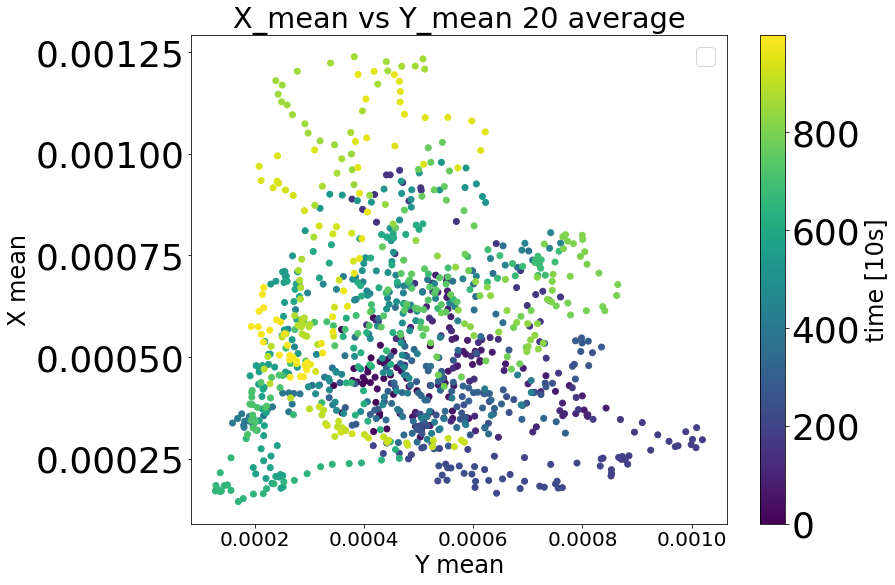

In [17]:
df = df_data_red
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df.index
x = np.arange(0,len(df)*10,10)
span = 20
y2= df.amplitude_x_12.ewm(span=span,adjust=True).mean()
y3= df.amplitude_x_18.ewm(span=span,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm)
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.ylabel("PSD %d [a.u.]" %(i+2))
#plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.xlabel("Y mean")
plt.ylabel("X mean")
plt.title("X_mean vs Y_mean %d average" %span)
plt.legend()
plt.show()


No handles with labels found to put in legend.


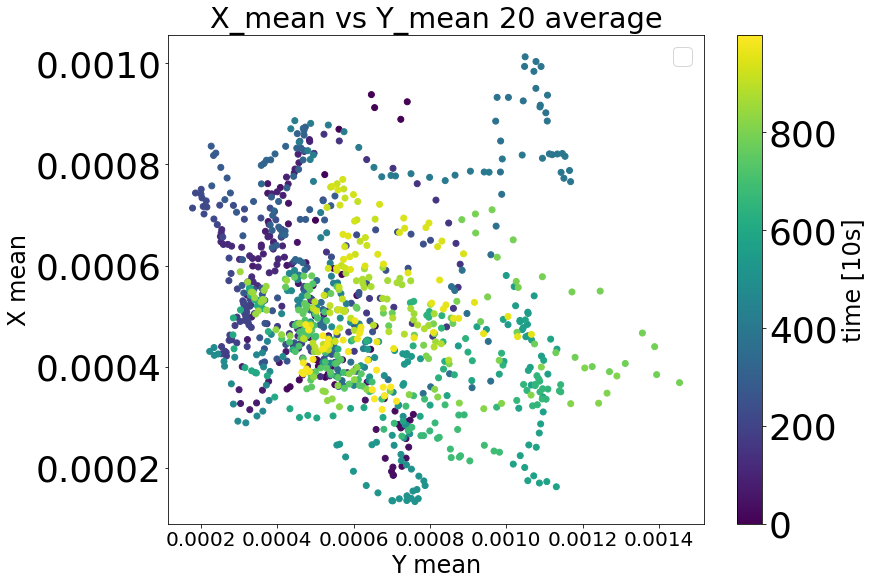

In [19]:
df = df2_data_red
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df.index
x = np.arange(0,len(df)*10,10)
span = 20
y2= df.amplitude_x_12.ewm(span=span,adjust=True).mean()
y3= df.amplitude_x_18.ewm(span=span,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm)
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.ylabel("PSD %d [a.u.]" %(i+2))
#plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.xlabel("Y mean")
plt.ylabel("X mean")
plt.title("X_mean vs Y_mean %d average" %span)
plt.legend()
plt.show()


No handles with labels found to put in legend.


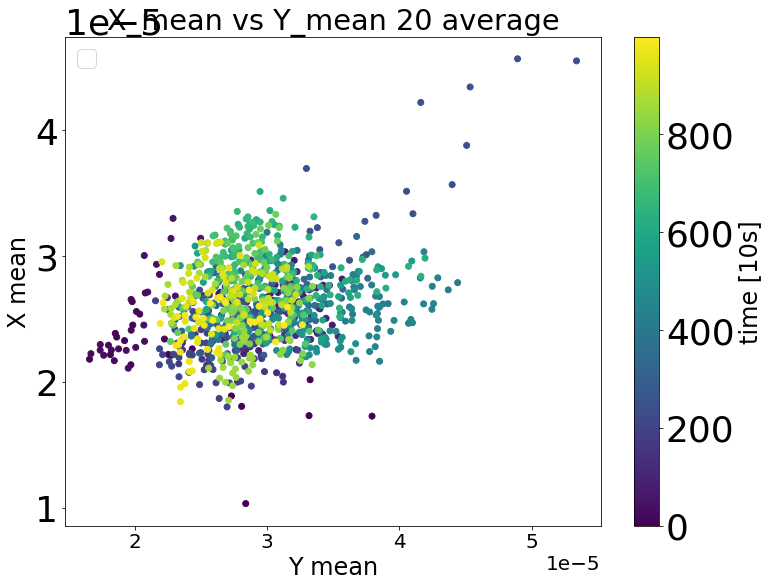

In [21]:
df = df_data_red_b
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df.index
x = np.arange(0,len(df)*10,10)
span = 20
y2= df.amplitude_x_12.ewm(span=span,adjust=True).mean()
y3= df.amplitude_x_18.ewm(span=span,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm)
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.ylabel("PSD %d [a.u.]" %(i+2))
#plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.xlabel("Y mean")
plt.ylabel("X mean")
plt.title("X_mean vs Y_mean %d average" %span)
plt.legend()
plt.show()


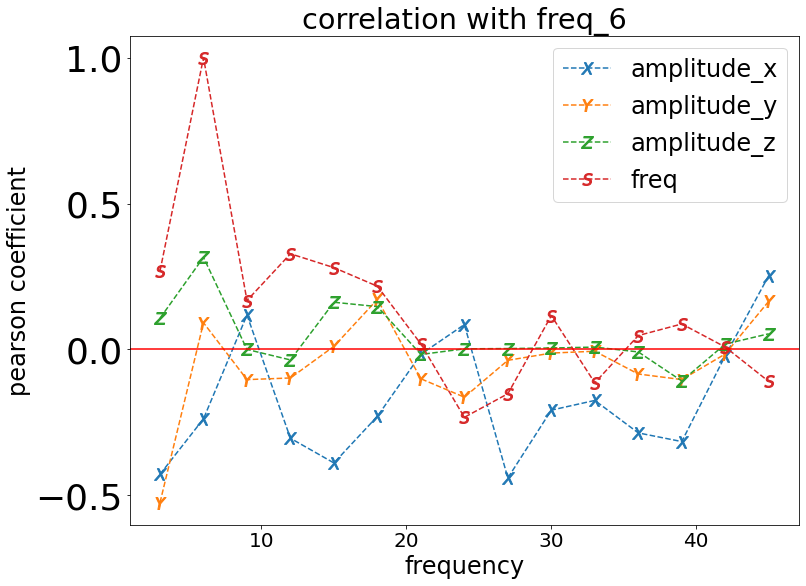

In [34]:
df = df_data_red
corr_with = ["amplitude_x","amplitude_y","amplitude_z","freq"]
c = compare_xyz_spin_amp_with_pearson("freq",6,pars=np.arange(3,48,3),df_data=df,df_spin=df_spin_red,corr_with=corr_with,spin=True,plot=True,title=None)

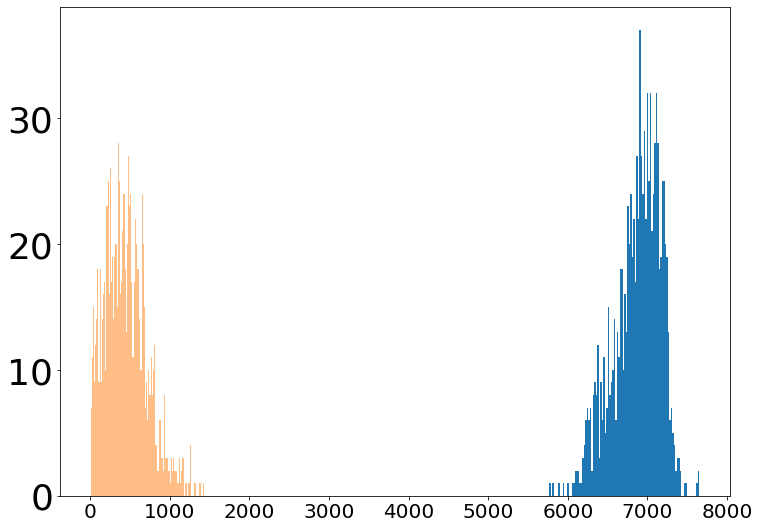

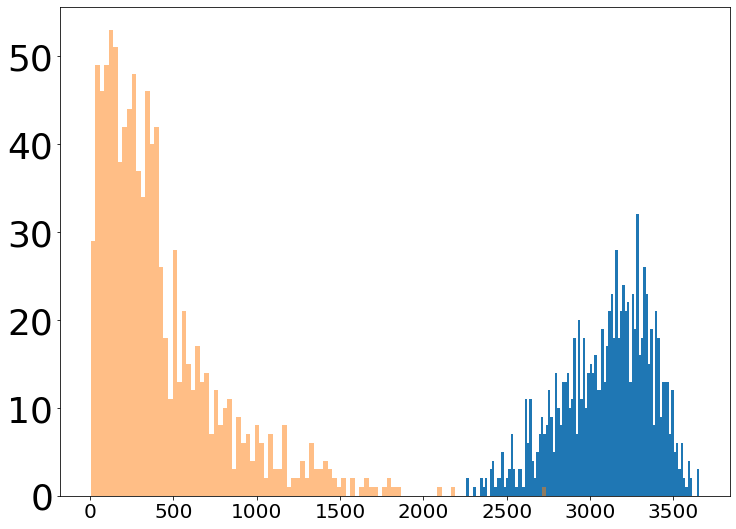

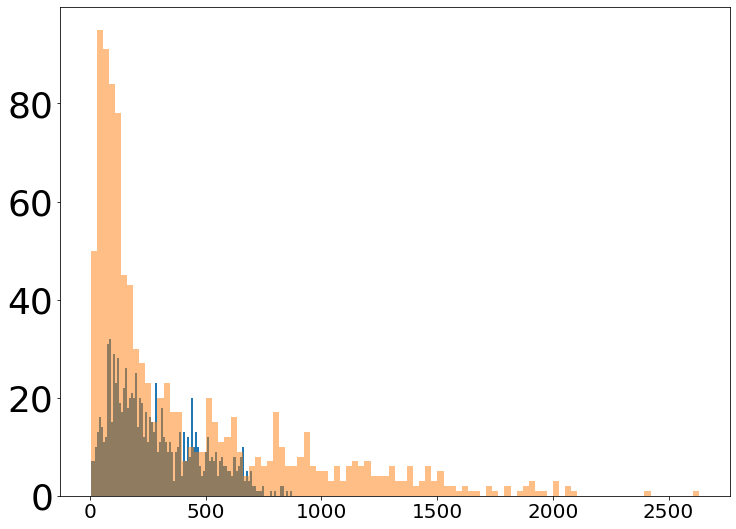

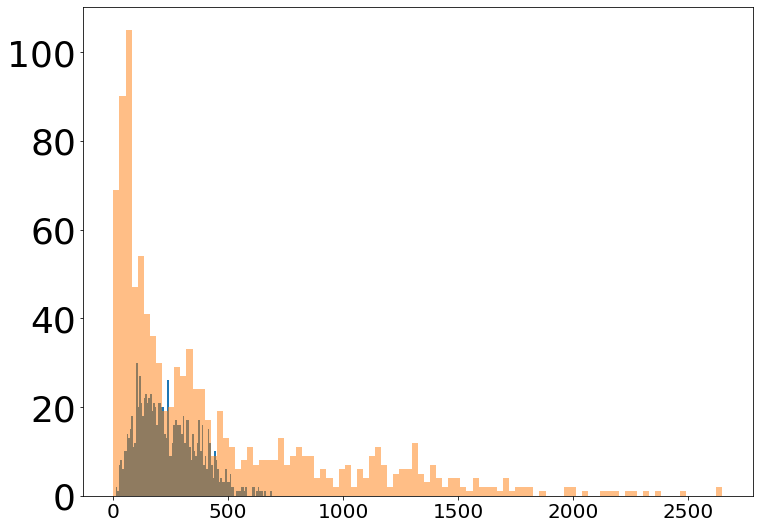

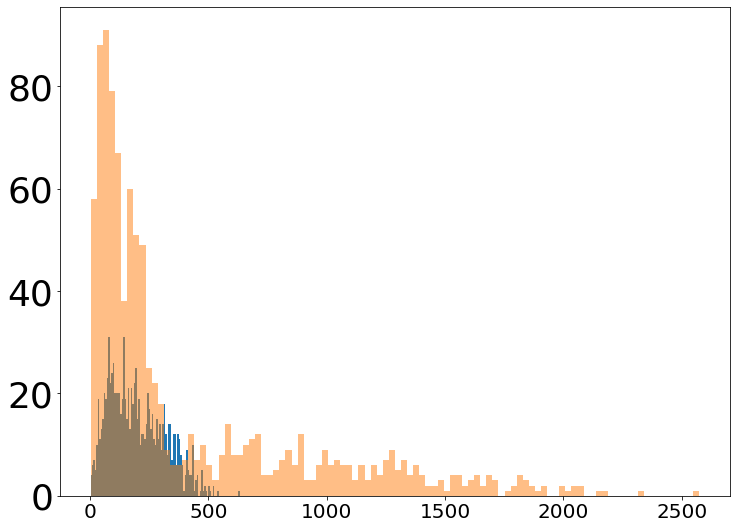

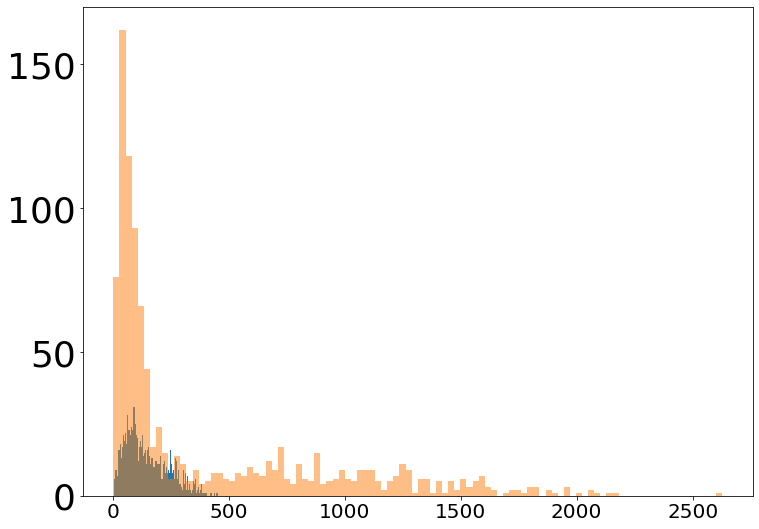

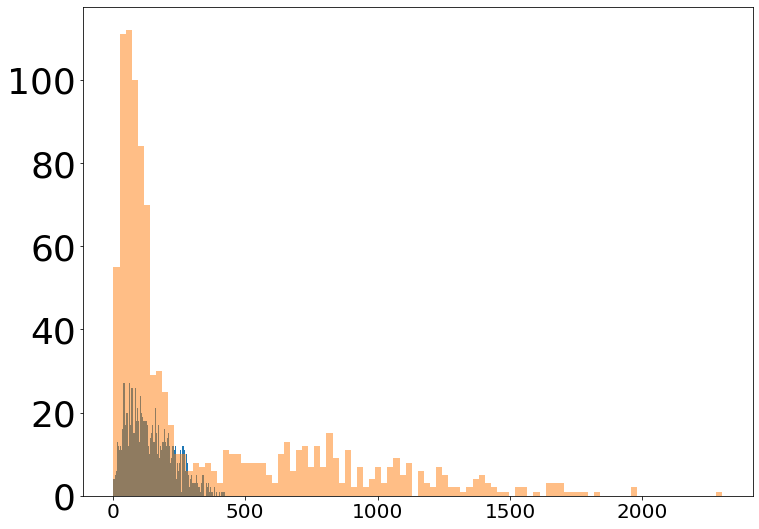

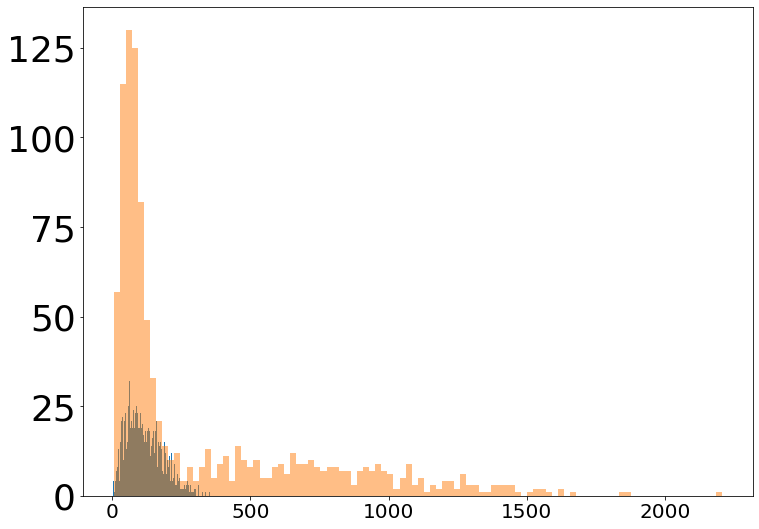

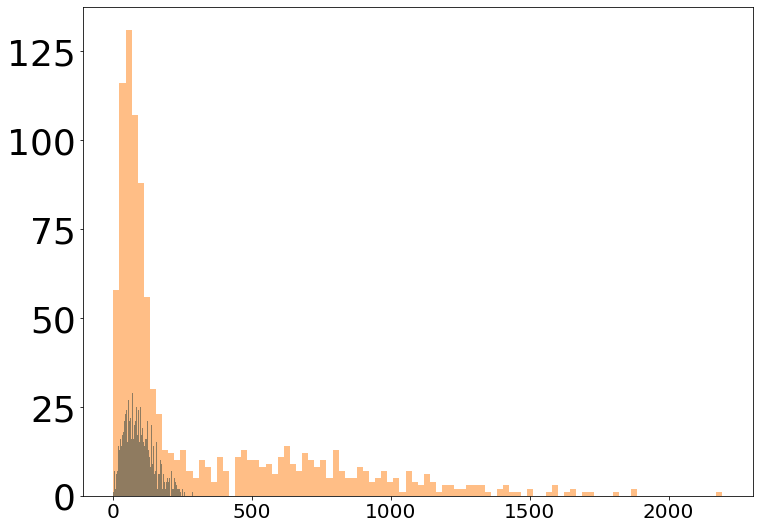

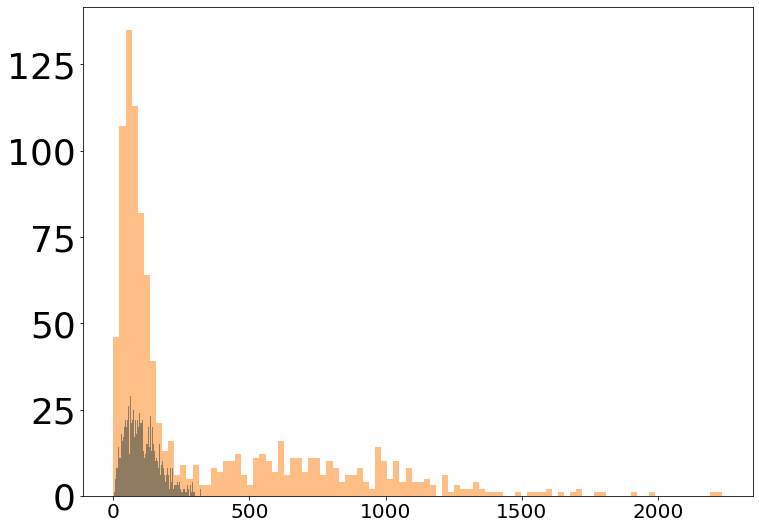

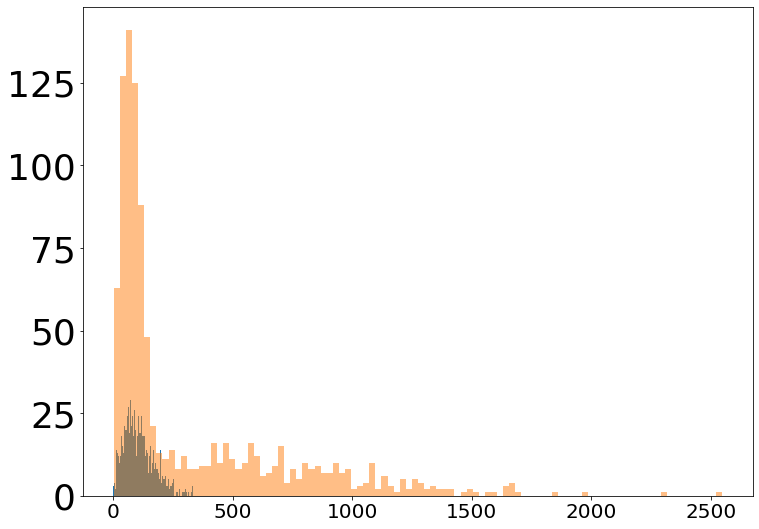

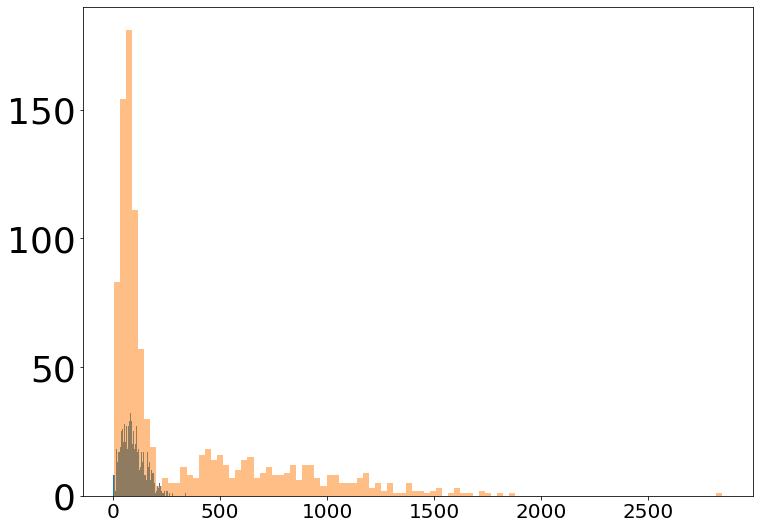

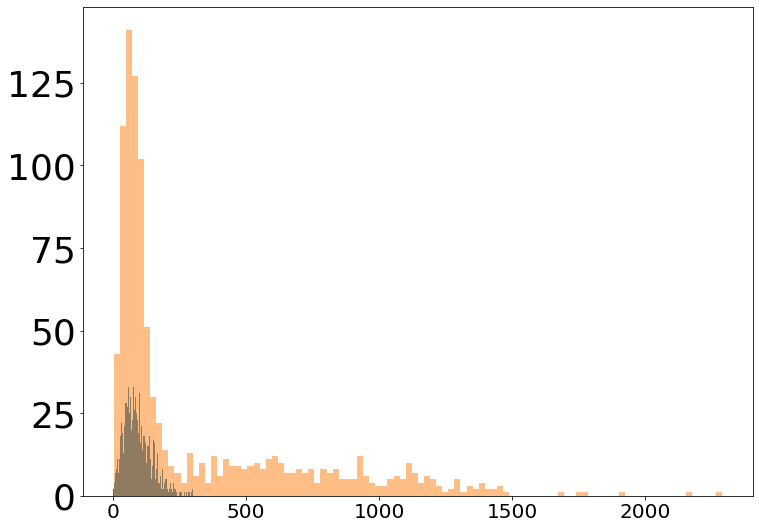

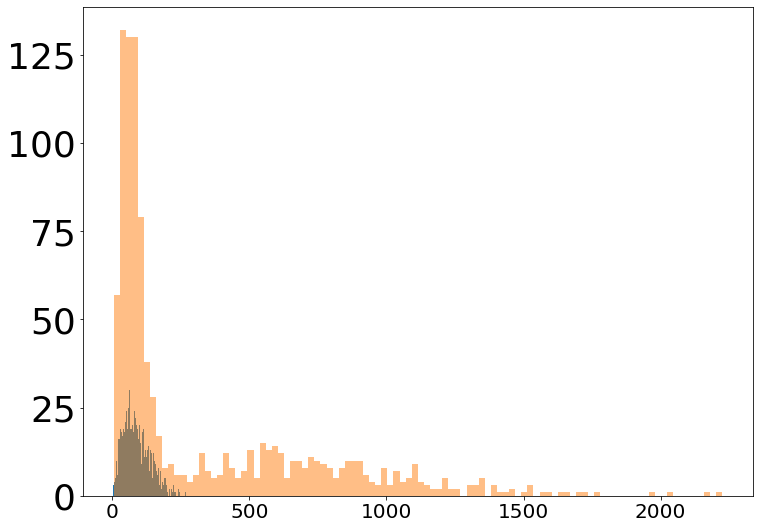

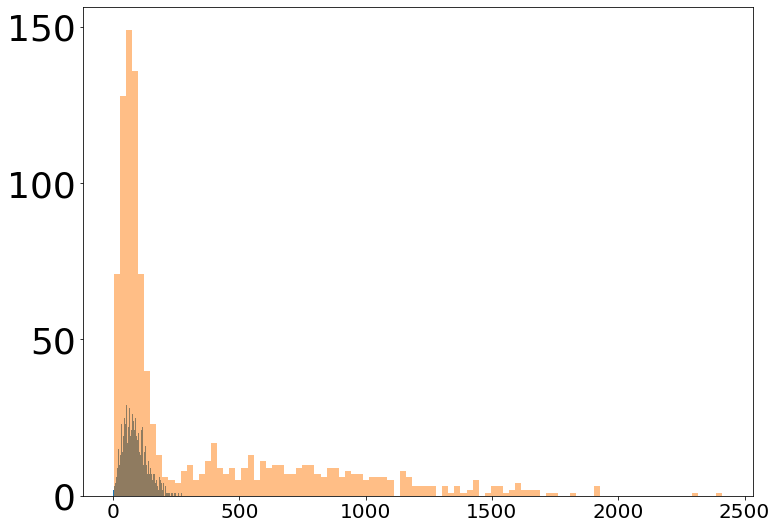

In [47]:
# look at phases
bins = 100
var_of_interest= "amplitude_z"
for i in np.arange(3,48,3):
    plt.hist(df_data_red["%s_%d" %(var_of_interest,i)],bins=bins, label="spin")
    plt.hist(df2_data_red["%s_%d"%(var_of_interest,i)],bins=bins, label="no_spin",alpha=0.5)
    #plt.xscale("log")
    #plt.savefig("Plots/z_phase_%d_shake_vs_no_shake" %i, dpi=150, bbox_inches="tight")
    plt.show()